In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
df=pd.read_csv('ants.csv')
df.head()

,Unnamed: 0,initial_population,shared_knowledge,recreate,solidarity,Living Ants,Dead Ants,% Dead Low Vision,% Dead High Vision,min_sugar,max_sugar,avg_sugar,stdev_sugar
0,0,100,False,0,NaN,64,36,0.638889,0.361111,7.0,2014.0,1235.156250,537.070455
1,1,100,False,0,NaN,59,41,0.658537,0.341463,158.0,2008.0,1309.627119,542.982311
2,2,100,False,0,NaN,68,32,0.718750,0.281250,80.0,2000.0,1293.147059,516.594366
3,3,100,False,0,NaN,59,41,0.487805,0.512195,128.0,2017.0,1288.152542,574.289180
4,4,100,False,0,NaN,65,35,0.742857,0.257143,196.0,2015.0,1243.723077,516.317414


In [124]:
len(df)

160

In [125]:
# selectors
population_100 = df['initial_population'] == 100
population_500 = df['initial_population'] == 500
population_1000 = df['initial_population'] == 1000
population_2000 = df['initial_population'] == 2000
no_knowledge = df['shared_knowledge'] == False
knowledge = df['shared_knowledge'] == True
no_solidarity = df['solidarity'] == False
solidarity = df['solidarity'] == True
no_recreate = df['recreate'] == 0
recreate = df['recreate'] == 1

In [126]:
# separate datasets
basic_100 = df[population_100 & no_knowledge & no_recreate]
basic_500 = df[population_500 & no_knowledge & no_recreate]
basic_1000 = df[population_1000 & no_knowledge & no_recreate]
basic_2000 = df[population_2000 & no_knowledge & no_recreate]
 
knowledge_100 = df[population_100 & knowledge & no_solidarity & no_recreate]
knowledge_500 = df[population_500 & knowledge & no_solidarity & no_recreate]
knowledge_1000 = df[population_1000 & knowledge & no_solidarity & no_recreate]
knowledge_2000 = df[population_2000 & knowledge & no_solidarity & no_recreate]
 
solidarity_100 = df[population_100 & knowledge & solidarity & no_recreate]
solidarity_500 = df[population_500 & knowledge & solidarity & no_recreate]
solidarity_1000 = df[population_1000 & knowledge & solidarity & no_recreate]
solidarity_2000 = df[population_2000 & knowledge & solidarity & no_recreate]
 
re_basic_100 = df[population_100 & no_knowledge & recreate]   
re_basic_500 = df[population_500 & no_knowledge & recreate]   
re_basic_1000 = df[population_1000 & no_knowledge & recreate]   
re_basic_2000 = df[population_2000 & no_knowledge & recreate]   

re_knowledge_100 = df[population_100 & knowledge & no_solidarity & recreate]
re_knowledge_500 = df[population_500 & knowledge & no_solidarity & recreate]
re_knowledge_1000 = df[population_1000 & knowledge & no_solidarity & recreate]
re_knowledge_2000 = df[population_2000 & knowledge & no_solidarity & recreate]

re_solidarity_100 = df[population_100 & knowledge & solidarity & recreate]   
re_solidarity_500 = df[population_500 & knowledge & solidarity & recreate]   
re_solidarity_1000 = df[population_1000 & knowledge & solidarity & recreate]   
re_solidarity_2000 = df[population_2000 & knowledge & solidarity & recreate] 

basic = {100: basic_100, 500: basic_500, 1000: basic_1000, 2000: basic_2000}
knowledge = {100: knowledge_100, 500: knowledge_500, 1000: knowledge_1000, 2000: knowledge_2000}
solidarity = {100: solidarity_100, 500: solidarity_500, 1000: solidarity_1000, 2000: solidarity_2000}
re_basic = {100: re_basic_100, 500: re_basic_500, 1000: re_basic_1000, 2000: re_basic_2000}
re_knowledge = {100: re_knowledge_100, 500: re_knowledge_500, 1000: re_knowledge_1000, 2000: re_knowledge_2000}
re_solidarity = {100: re_solidarity_100, 500: re_solidarity_500, 1000: re_solidarity_1000, 2000: re_solidarity_2000}

In [127]:
def draw_grid(A, B):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18, 10))

    x = [100,500,1000,2000]

    b_plot = [y[A].mean() for y in basic.values()]
    k_plot = [y[A].mean() for y in knowledge.values()]
    s_plot = [y[A].mean() for y in solidarity.values()]
    ax1.plot(x, b_plot, 'bo', label="Basic")
    ax1.plot(x, k_plot, 'yo', label="Knowledge")
    ax1.plot(x, s_plot, 'ro', label="Solidarity")
    ax1.annotate(A, xy=(.025, .975), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', fontsize=12)

    b_plot = [y[B].mean() for y in basic.values()]
    k_plot = [y[B].mean() for y in knowledge.values()]
    s_plot = [y[B].mean() for y in solidarity.values()]
    ax2.plot(x, b_plot, 'bo', label="Basic")
    ax2.plot(x, k_plot, 'yo', label="Knowledge")
    ax2.plot(x, s_plot, 'ro', label="Solidarity")
    ax2.annotate(B, xy=(.025, .975), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', fontsize=12)

    b_plot = [y[A].mean() for y in re_basic.values()]
    k_plot = [y[A].mean() for y in re_knowledge.values()]
    s_plot = [y[A].mean() for y in re_solidarity.values()]
    ax3.plot(x, b_plot, 'bo', label="Basic")
    ax3.plot(x, k_plot, 'yo', label="Knowledge")
    ax3.plot(x, s_plot, 'ro', label="Solidarity")
    ax3.annotate(f'{A} (Recreating)', xy=(.025, .975), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', fontsize=12)

    b_plot = [y[B].mean() for y in re_basic.values()]
    k_plot = [y[B].mean() for y in re_knowledge.values()]
    s_plot = [y[B].mean() for y in re_solidarity.values()]
    ax4.plot(x, b_plot, 'bo', label="Basic")
    ax4.plot(x, k_plot, 'yo', label="Knowledge")
    ax4.plot(x, s_plot, 'ro', label="Solidarity")
    ax4.annotate(f'{B} (Recreating)', xy=(.025, .975), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', fontsize=12)

    leg = ax1.legend(loc='best', ncol=1, shadow=True, fancybox=True)
    plt.show()

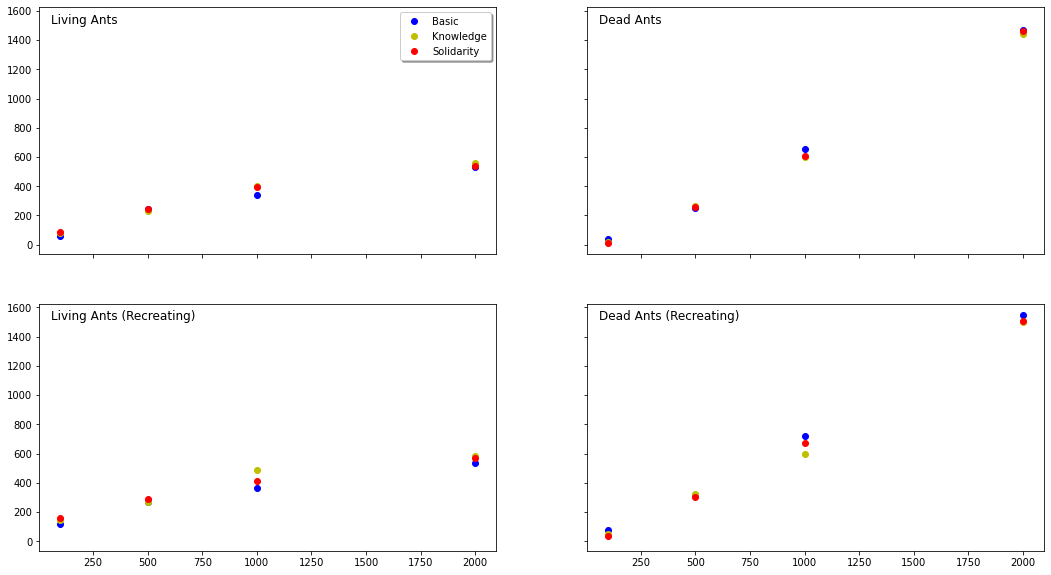

In [128]:
draw_grid("Living Ants", "Dead Ants")

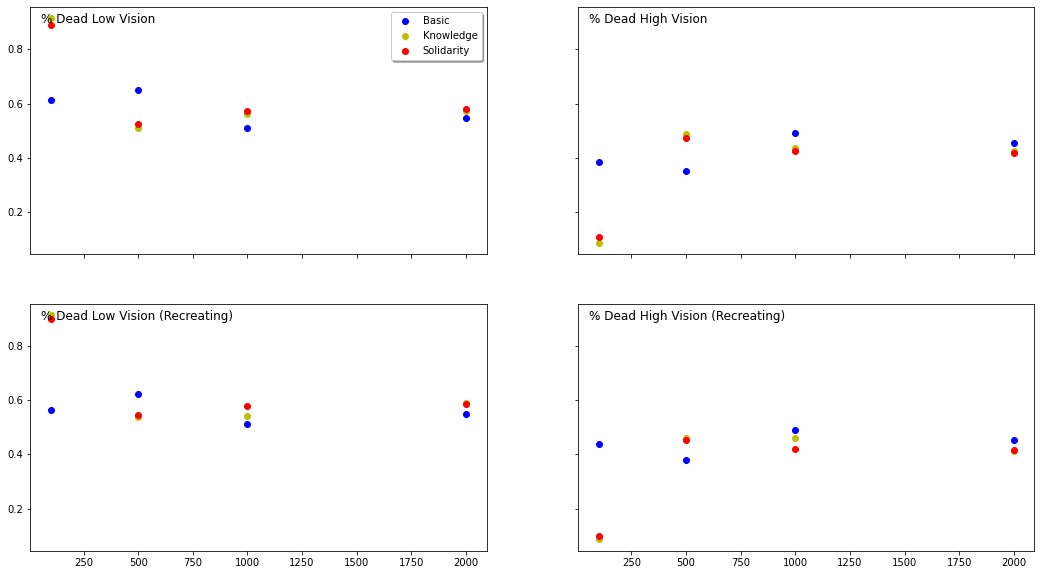

In [129]:
draw_grid("% Dead Low Vision", "% Dead High Vision")

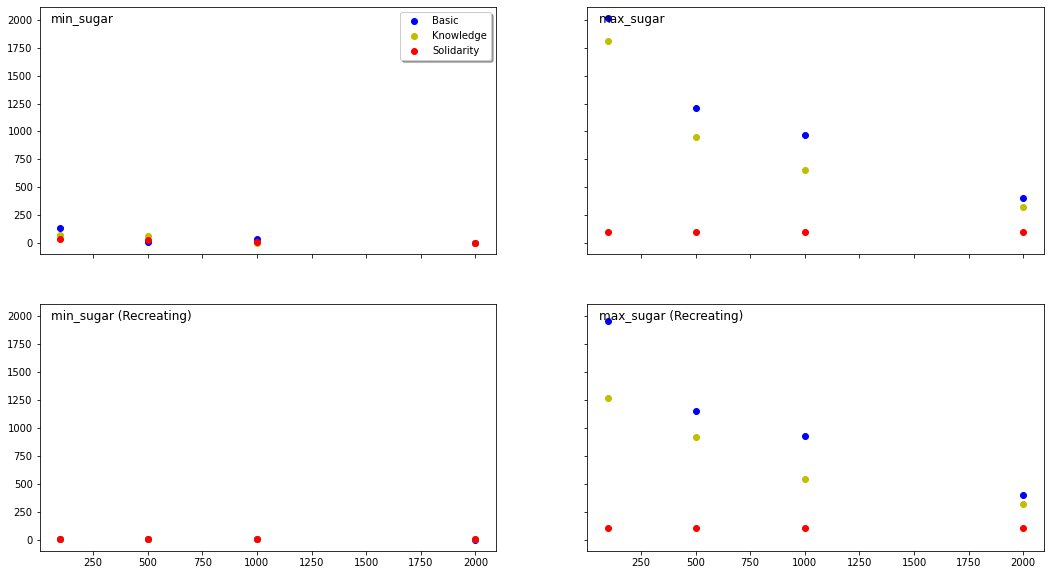

In [130]:
draw_grid("min_sugar", "max_sugar")

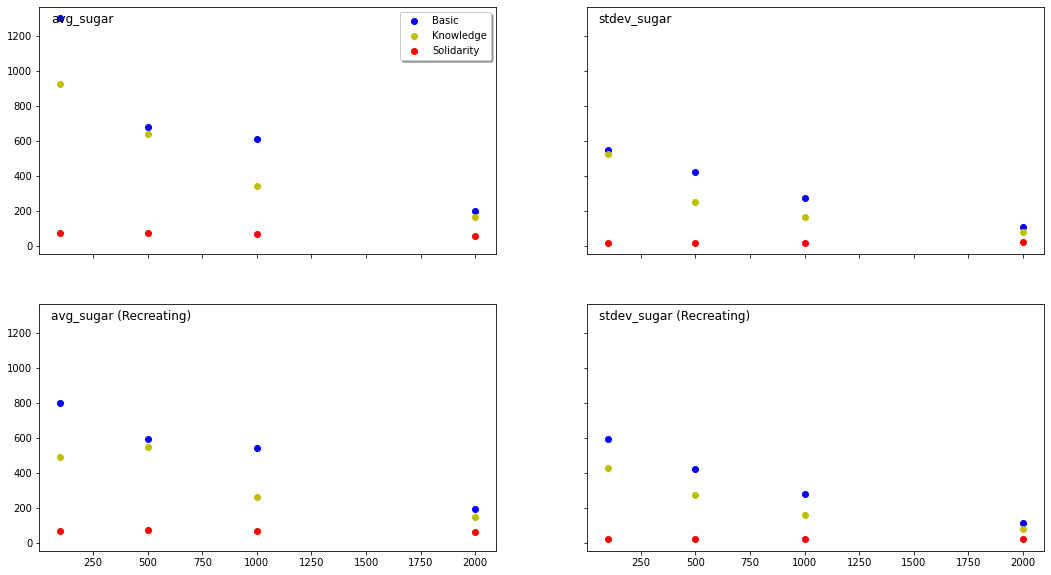

In [131]:
draw_grid("avg_sugar", "stdev_sugar")

## Findings

1. population of 2000 seems too extreme for the territory
2. knowledge leads to slightly more living ants
3. knowledge increases death segregation for population of 100 but improves equality for population of 500
4. the implemented concept of solidarity does not significantly increase the number of living ants, nor death segregation. However, it leads to more even spread of sugar.